In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import math
import matplotlib.dates as mdates
import matplotlib.cbook as cbook

In [4]:
dfm = pd.DataFrame( pd.read_csv("meteonogal.csv", engine="python" ) )
dfs = pd.DataFrame( pd.read_csv("solinogal.csv", engine="python" ) )

In [5]:
# como ya se trabajó con el dfm en la actividad 7
# se vuelven a realizar los pasos para adecuar el archivo
# a las actividades necesarias;
# se eliminan las columnas unnamed y el renglon inicial
dfm=dfm.drop(dfm.columns[dfm.columns.str.contains('unnamed:',case = False)],axis = 1)
dfm = dfm.drop(dfm.index[0]).reset_index(drop=True)
dfm.head()

,DATE,TIME,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg
0,01-01-09,00:10,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12
1,01-01-09,00:20,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02
2,01-01-09,00:30,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001
3,01-01-09,00:40,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737
4,01-01-09,00:50,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39


In [6]:
dfm["DATE + TIME"] = dfm["DATE"] +" "+ dfm["TIME"]
dfm['FECHA'] = pd.to_datetime(dfm.apply(lambda x: x['DATE + TIME'], 1), dayfirst=True)
dfm.drop( ["DATE","TIME"], axis=1, inplace=True) 
dfm = dfm.drop(['DATE + TIME'], 1)
dfm.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA
0,1.215,0.506,-0.044,10.95,1.159,-176.5,23.58,-26.72,1.327,9.4,0.899,1.178,1.059,8.12,2009-01-01 00:10:00
1,0.892,0.588,-0.072,10.81,1.159,-176.6,23.73,-26.76,1.079,9.24,0.896,1.166,1.045,8.02,2009-01-01 00:20:00
2,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00
3,1.135,0.7410001,-0.093,9.8,1.258,-182.7,23.41,-26.46,1.384,9.059999,0.874,1.152,1.008,7.737,2009-01-01 00:40:00
4,0.7550001,1.064,-0.149,8.87,1.332,-184.8,23.22,-26.39,1.359,8.63,0.859,1.119,0.961,7.39,2009-01-01 00:50:00


In [7]:
# de la variable fecha se divide en meses, dias, horas y minutos
dfm['MES'] = dfm['FECHA'].dt.month
dfm['DIA'] = dfm['FECHA'].dt.day
dfm['HORA'] = dfm['FECHA'].dt.hour
dfm['MINUTO'] = dfm['FECHA'].dt.minute

In [8]:
# Para aprovechar los datos cada 30 minutos
dfm = dfm[((dfm['MINUTO'] == 30.0) | (dfm['MINUTO'] == 0.0) ) & (dfm['FECHA']<'2010-01-01 00:30:00')]
dfm = dfm.reset_index(drop=True)
dfm.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,rh_Avg,e_sat_Avg,e_Avg,h2o_hmp_Avg,FECHA,MES,DIA,HORA,MINUTO
0,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,0.896,1.152,1.032,7.926001,2009-01-01 00:30:00,1.0,1.0,0.0,30.0
1,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,0.840,1.097,0.9210001,7.089,2009-01-01 01:00:00,1.0,1.0,1.0,0.0
2,0.118,1.321,-0.071,8.69,1.422,-187.8,24.04,-27.16,1.338,7.539001,0.846,1.039,0.8790001,6.787,2009-01-01 01:30:00,1.0,1.0,1.0,30.0
3,0.7550001,1.193,-0.149,7.612,1.36,-174,20.87,-21.68,1.457,6.76,0.902,0.9850001,0.8880001,6.876,2009-01-01 02:00:00,1.0,1.0,2.0,0.0
4,1.08,0.839,-0.149,7.761,1.404,-170.7,18.15,-21.55,1.422,7.288001,0.845,1.021,0.863,6.669,2009-01-01 02:30:00,1.0,1.0,2.0,30.0


In [9]:
dfm.dtypes

u_Avg                  object
v_Avg                  object
w_Avg                  object
t_Avg                  object
kh20_Avg               object
net_rad_Avg            object
shf1_Avg               object
shf2_Avg               object
vv_Avg                 object
airT_Avg               object
rh_Avg                float64
e_sat_Avg              object
e_Avg                  object
h2o_hmp_Avg            object
FECHA          datetime64[ns]
MES                   float64
DIA                   float64
HORA                  float64
MINUTO                float64
dtype: object

In [10]:
# para el dfs 
dfs.dtypes

id                        int64
2 Year_RTM  L             int64
3 Day_RTM  L              int64
4 Hour_Minute_RTM  L      int64
5 T108v_1_AVG  L        float64
6 T108v_2_AVG  L        float64
7 T108v_3_AVG  L        float64
8 T108v_4_AVG  L        float64
9 T108v_5_AVG  L        float64
10 T108v_6_AVG  L       float64
11 T108v_7_AVG  L       float64
12 T108v_8_AVG  L       float64
Tsuelo_10cm             float64
Tsuelo_20cm             float64
Tsuelo_30cm             float64
Tsuelo_40cm             float64
Tsuelo_55cm             float64
Tsuelo_70cm             float64
Tsuelo_85cm             float64
Tsuelo_100cm            float64
21 Tref_AVG  L          float64
22 period_1  L          float64
23 period_2  L          float64
24 period_3  L          float64
25 period_4  L          float64
26 period_5  L          float64
27 period_6  L          float64
28 period_7  L          float64
29 period_8  L          float64
30 TVWC_1  L            float64
                         ...   
35 TVWC_

In [11]:
# eliminamos aquellas columnas que no son de nuestro interés y nos quedamos con dfs
dfs = dfs.filter(['2 Year_RTM  L','3 Day_RTM  L','4 Hour_Minute_RTM  L','Tsuelo_10cm',
                  'Tsuelo_20cm','Tsuelo_30cm','Tsuelo_40cm'
                  ,'Tsuelo_55cm','Tsuelo_70cm','Tsuelo_85cm','Tsuelo_100cm'],axis=1)
dfs.head()

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,2009,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,2009,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,2009,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,2009,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,2009,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [12]:
# Ya que queremos agregar una columna de fecha al dfs
# Necesitamos generar un dataframe nuevo con el cual la horas y minutos 
# sean medidos de igual manera que en el dfm (cada 30 minutos)
# Se cambia la columna '4 Hour_Minute_RTM  L' a string, 
# para poder despues utiliarla como fecha a partir de horas y minutos
dfs['4 Hour_Minute_RTM  L'] = dfs['4 Hour_Minute_RTM  L'].astype(str)

In [13]:
# ya que '4 Hour_Minute_RTM  L' esta dandonos en los ultimos dos
# dígitos, los minutos, y en en el primero o primeros dos (dependiendo el caso)
# lo que necesitamos es separar las horas y los minutos de la columna

horas = []
minutos = []

for i in range(0,len(dfs)):
    if (len(str(dfs['4 Hour_Minute_RTM  L'][i]))==4):
        if (str(dfs['4 Hour_Minute_RTM  L'][i])[0:2]=='24'):
            horas.append('0')
            minutos.append('0')
            # De esta manera, al encontrar 4 dígitos en el valor de 
            # la columna, ubicamos aquellos que inicien con 24 como
            # el lugar donde se vuelve a inicar el conteo, por eso 
            # se utiliza append con el valor dado '0'
        else:
            h = str(dfs['4 Hour_Minute_RTM  L'][i][0:2])
            m = str(dfs['4 Hour_Minute_RTM  L'][i][2:4])
            horas.append(h)
            minutos.append(m)
            # por el contrario, cuando no inician con 24, tomamos el dato
            # de los primeros dos dígitos (horas) y los agregamos al str horas
            # y los ultimos dos dígitos (minutos) se agregan al str minutos
    elif(len(str(dfs['4 Hour_Minute_RTM  L'][i]))==3):
            h = str(dfs['4 Hour_Minute_RTM  L'][i][0:1])
            m = str(dfs['4 Hour_Minute_RTM  L'][i][1:3])
            horas.append(h)
            minutos.append(m)
    
            # En este caso, si se encuentran 3 dígitos en la columna, lo que se
            # tiene que hacer es tomar el valor del primer dígito como la hora
            # y los últimos dos como los minutos
    elif(len(str(dfs['4 Hour_Minute_RTM  L'][i]))==2):
            h = '0'
            m = str(dfs['4 Hour_Minute_RTM  L'][i][0:2])
            horas.append(h)
            minutos.append(m)
            # por último, si la columna tiene dos dígitos, el valor de hora
            # se encuentra fijo en '0' mientras que el de minutos toma los 
            # ultimos dos.
            
# Mientras tanto, los dias se mantienen estables
dias =[dfs['3 Day_RTM  L'][i] for i in range(0,len(dfs))]

In [14]:
new = {'DIAS': dias, 'HORAS': horas, 'MINUTOS': minutos}
FECHAS = pd.DataFrame(data=new)
FECHAS.head()

,DIAS,HORAS,MINUTOS
0,1,0,30
1,1,1,00
2,1,1,30
3,1,2,00
4,1,2,30


In [15]:
FECHAS.dtypes

DIAS        int64
HORAS      object
MINUTOS    object
dtype: object

In [16]:
# ya que queremos hacer una variable FECHA estilo datetime, 
# tenemos que asegurarnos que el día cambie cada vez que 
# la hora llegue a 0:0 (que sea un nuevo dia):

dia=[]

for i in range(0,len(dfs)):
    if (FECHAS['HORAS'][i]=='0' and FECHAS['MINUTOS'][i]=='0'):
        dia.append(FECHAS['DIAS'][i] +1)
    else:
        dia.append(FECHAS['DIAS'][i])
# Se agrega al dataframe usando

FECHAS['DIA']=dia
FECHAS.head(50)

,DIAS,HORAS,MINUTOS,DIA
0,1,0,30,1
1,1,1,00,1
2,1,1,30,1
3,1,2,00,1
4,1,2,30,1
5,1,3,00,1
6,1,3,30,1
7,1,4,00,1
8,1,4,30,1
9,1,5,00,1


In [17]:
# Haciendo un str con el dia, hora y minuto
dhm = []
for i in range (0,len(dfs)):
    dhm.append('2009 '+str(FECHAS['DIA'][i])+ ' ' + 
               FECHAS['HORAS'][i]+' '+FECHAS['MINUTOS'][i])

In [18]:
import datetime as dt

# para despues convertirlo a datetime
fecha = []
for i in range(0,len(dfs)):
    d = dt.datetime.strptime(dhm[i],'%Y %j %H %M')
    F = d.isoformat(' ')
    fecha.append(F)
    
# y finalmente agregarlo al dataframe dfs
dfs['FECHA'] = fecha
dfs.head()

,2 Year_RTM L,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,FECHA
0,2009,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62,2009-01-01 00:30:00
1,2009,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62,2009-01-01 01:00:00
2,2009,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62,2009-01-01 01:30:00
3,2009,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60,2009-01-01 02:00:00
4,2009,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60,2009-01-01 02:30:00


In [19]:
dfs['FECHA'] = pd.to_datetime(dfs.apply(lambda x: x['FECHA'], 1), dayfirst=True)

In [20]:
dfs.dtypes

2 Year_RTM  L                    int64
3 Day_RTM  L                     int64
4 Hour_Minute_RTM  L            object
Tsuelo_10cm                    float64
Tsuelo_20cm                    float64
Tsuelo_30cm                    float64
Tsuelo_40cm                    float64
Tsuelo_55cm                    float64
Tsuelo_70cm                    float64
Tsuelo_85cm                    float64
Tsuelo_100cm                   float64
FECHA                   datetime64[ns]
dtype: object

In [21]:
# Se unen ambos dfm y dfs a partir de la variable FECHA
dfu = pd.merge(dfm, dfs, on=['FECHA'])

In [22]:
dfu.head()

,u_Avg,v_Avg,w_Avg,t_Avg,kh20_Avg,net_rad_Avg,shf1_Avg,shf2_Avg,vv_Avg,airT_Avg,...,3 Day_RTM L,4 Hour_Minute_RTM L,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm
0,1.227,0.6850001,-0.06900001,10.34,1.224,-175.5,23.61,-26.46,1.421,9.059999,...,1,30,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62
1,0.8850001,0.992,-0.167,8.76,1.45,-183.4,23.33,-26.98,1.39,8.34,...,1,100,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62
2,0.118,1.321,-0.071,8.69,1.422,-187.8,24.04,-27.16,1.338,7.539001,...,1,130,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62
3,0.7550001,1.193,-0.149,7.612,1.36,-174,20.87,-21.68,1.457,6.76,...,1,200,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60
4,1.08,0.839,-0.149,7.761,1.404,-170.7,18.15,-21.55,1.422,7.288001,...,1,230,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60


In [27]:
# Nos quedamos solamente con las columnas de interes,
# que solo son aquellas que se pide graficar.
dfu = dfu.filter(['FECHA','Tsuelo_10cm','Tsuelo_20cm','Tsuelo_30cm',
                  'Tsuelo_40cm','Tsuelo_55cm','Tsuelo_70cm',
                  'Tsuelo_85cm','Tsuelo_100cm','t_Avg','air_Avg',
                  'net_rad_Avg','airT_Avg'],axis=1)
dfu.head()

,FECHA,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_30cm,Tsuelo_40cm,Tsuelo_55cm,Tsuelo_70cm,Tsuelo_85cm,Tsuelo_100cm,t_Avg,net_rad_Avg,airT_Avg
0,2009-01-01 00:30:00,14.36,14.70,15.22,15.52,16.11,17.02,17.75,18.62,10.34,-175.5,9.059999
1,2009-01-01 01:00:00,14.33,14.70,15.24,15.52,16.11,17.02,17.75,18.62,8.76,-183.4,8.34
2,2009-01-01 01:30:00,14.28,14.69,15.24,15.54,16.11,17.02,17.74,18.62,8.69,-187.8,7.539001
3,2009-01-01 02:00:00,14.24,14.69,15.25,15.55,16.12,17.02,17.74,18.60,7.612,-174,6.76
4,2009-01-01 02:30:00,14.19,14.69,15.27,15.55,16.12,17.02,17.73,18.60,7.761,-170.7,7.288001


In [28]:
# Hago un dataframe del día que me interesa (15)
Dia15 = dfu['2009-01-15 00:00:00'<=dfu['FECHA']]
Dia15 = Dia15['2009-01-16 00:00:00'>dfu['FECHA']]
#Selecciono solamente las columnas de interés
Dia15i = Dia15.filter(['Tsuelo_10cm','Tsuelo_20cm',
                      'Tsuelo_40cm','Tsuelo_85cm',],axis=1)
Dia15i.head()

C:\Users\NTIC-USER\Anaconda3\lib\site-packages\ipykernel_launcher.py:3: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  This is separate from the ipykernel package so we can avoid doing imports until


,Tsuelo_10cm,Tsuelo_20cm,Tsuelo_40cm,Tsuelo_85cm
671,15.45,15.62,15.76,17.35
672,15.38,15.62,15.78,17.35
673,15.32,15.61,15.79,17.35
674,15.25,15.59,15.79,17.34
675,15.17,15.58,15.80,17.34


<Figure size 648x432 with 0 Axes>

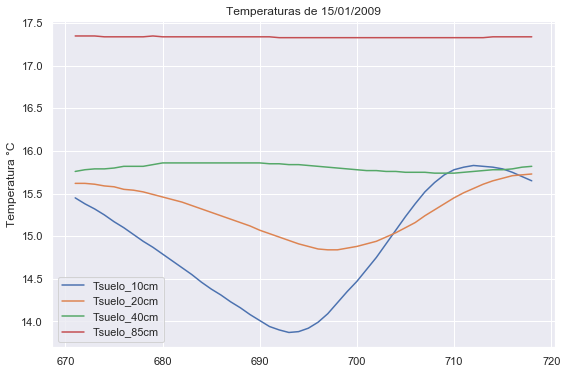

In [57]:
# Subsuelo 15 de enero 2019
sns.set(rc={'figure.figsize':(9,6)})
fig=plt.figure(); Dia15i.plot(); plt.legend(loc='best')
plt.title("Temperaturas de 15/01/2009")
plt.ylabel("Temperatura °C")
plt.grid(True)

In [58]:
Dia15.dtypes

FECHA             int64
Tsuelo_10cm     float64
Tsuelo_20cm     float64
Tsuelo_30cm     float64
Tsuelo_40cm     float64
Tsuelo_55cm     float64
Tsuelo_70cm     float64
Tsuelo_85cm     float64
Tsuelo_100cm    float64
t_Avg           float64
net_rad_Avg     float64
airT_Avg        float64
dtype: object

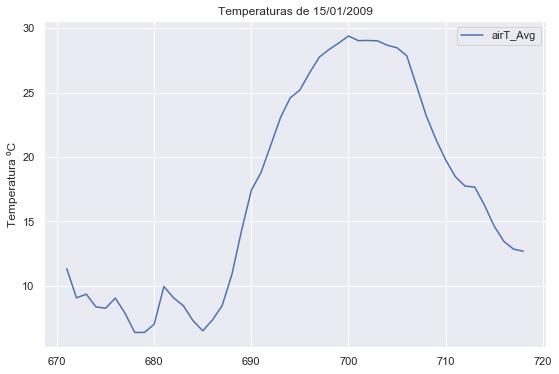

In [59]:
Dia15 = Dia15.apply(pd.to_numeric, errors='coerce')
#Temperatura del aire para el 01/01/2009
fig=plt.figure(); Dia15['airT_Avg'].plot() ; plt.legend(loc='best')
plt.title("Temperaturas de 15/01/2009")
plt.ylabel("Temperatura ºC")
plt.grid(True)

In [60]:
# Realizando para 2009

dfa=dfu

#Primero crearemos variables para día y mes
dfa['DIA']=dfa['FECHA'].dt.day
dfa['MES']=dfa['FECHA'].dt.month

# se necesita un dataframe que contenga las temperaturas maximas minimas y promedio de cada 
# temperatura del subsuelo, por lo tanto se crean nuevos dataframes

#Para Tsuelo_10cm 
df10=dfa.filter(['DIA','MES','Tsuelo_10cm'],axis=1)
#tmin, tmax y tprom
df10["Tsuelo_10cm_max"] = np.round(df10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("max"),decimals=1)
df10["Tsuelo_10cm_min"] = np.round(df10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("min"),decimals=1)
df10["Tsuelo_10cm_prom"] = np.round(df10.groupby(["MES","DIA"])["Tsuelo_10cm"].transform("mean"),decimals=1)

#Para Tsuelo_20cm  
df20=dfa.filter(['DIA','MES','Tsuelo_20cm'],axis=1)
#tmin, tmax y tprom
df20["Tsuelo_20cm_max"] = np.round(df20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("max"),decimals=1)
df20["Tsuelo_20cm_min"] = np.round(df20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("min"),decimals=1)
df20["Tsuelo_20cm_prom"] = np.round(df20.groupby(["MES","DIA"])["Tsuelo_20cm"].transform("mean"),decimals=1)

#Para Tsuelo_40cm 
df40=dfa.filter(['DIA','MES','Tsuelo_40cm'],axis=1)
#tmin, tmax y tprom
df40["Tsuelo_40cm_max"] = np.round(df40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("max"),decimals=1)
df40["Tsuelo_40cm_min"] = np.round(df40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("min"),decimals=1)
df40["Tsuelo_40cm_prom"] = np.round(df40.groupby(["MES","DIA"])["Tsuelo_40cm"].transform("mean"),decimals=1)

#Para Tsuelo_85cm 
df85=dfa.filter(['DIA','MES','Tsuelo_85cm'],axis=1)
#tmin, tmax y tprom
df85["Tsuelo_85cm_max"] = np.round(df85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("max"),decimals=1)
df85["Tsuelo_85cm_min"] = np.round(df85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("min"),decimals=1)
df85["Tsuelo_85cm_prom"] = np.round(df85.groupby(["MES","DIA"])["Tsuelo_85cm"].transform("mean"),decimals=1)


# se elimina aquello que no se va a graficar
df10 = df10.drop(['Tsuelo_10cm','DIA','MES'], 1)
df40 = df40.drop(['Tsuelo_40cm','DIA','MES'], 1)
df20 = df20.drop(['Tsuelo_20cm','DIA','MES'], 1)
df85 = df85.drop(['Tsuelo_85cm','DIA','MES'], 1)

C:\Users\NTIC-USER\Anaconda3\lib\site-packages\pandas\core\series.py:1828: RuntimeWarning: invalid value encountered in rint
  result = com._values_from_object(self).round(decimals)


<Figure size 648x432 with 0 Axes>

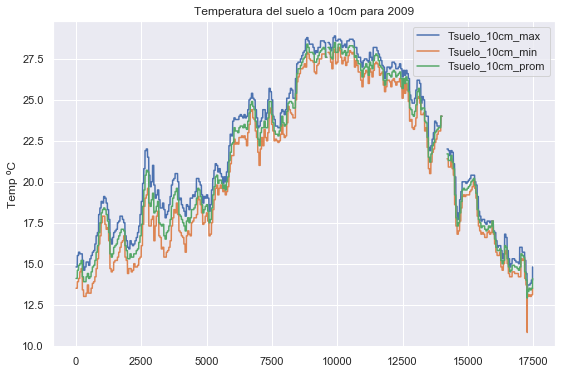

In [61]:
# para el subsuelo 10cm
fig=plt.figure(); df10.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

<Figure size 648x432 with 0 Axes>

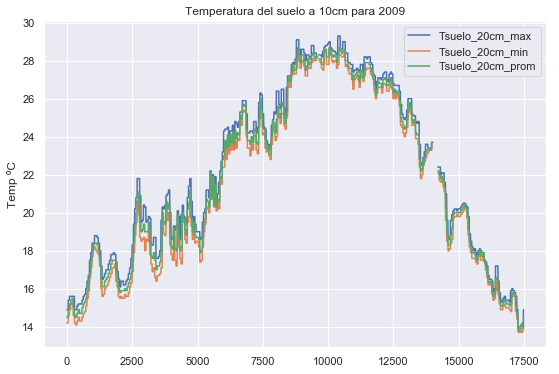

In [62]:
# para el subsuelo 20cm
fig=plt.figure(); df20.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

<Figure size 648x432 with 0 Axes>

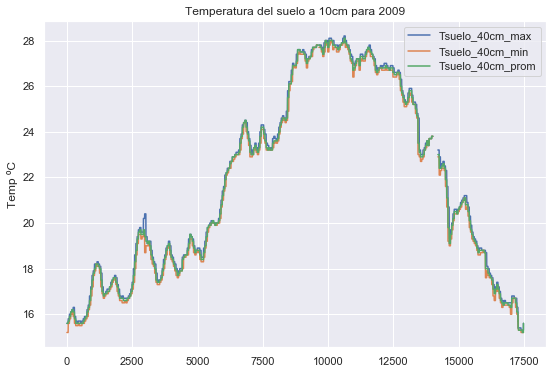

In [63]:
# para el subsuelo 40cm
fig=plt.figure(); df40.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)

<Figure size 648x432 with 0 Axes>

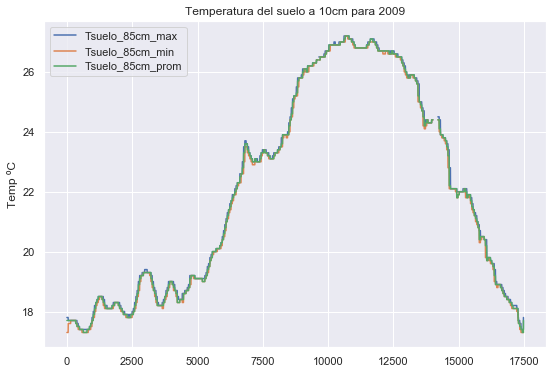

In [64]:
# para el subsuelo 85cm
fig=plt.figure(); df85.plot() ; plt.legend(loc='best')
plt.title("Temperatura del suelo a 10cm para 2009")
plt.ylabel("Temp ºC")
plt.grid(True)